# Exercise 7
 **Note:** Due to compatibility problems on running Netcarto and Informap community detection algorithms, we didn't use these methods on this exercise

Import stuff we'll need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import asyn_lpa_communities
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
import os
np.random.seed(50)

# Generate a graph for girvan newman benchmark
def benchmark_girvan_newman():
    N = 128
    tau1 = 3
    tau2 = 1.5
    mu = 0.04
    k =16
    minc = 32
    maxc = 32
    return LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k,
                            max_degree = k, min_community=minc, max_community = maxc, seed = 10)

Make community detection functions

In [2]:
# Louvain's community detection method
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = list()
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        communities.append(sorted(list_nodes))
    return sorted(communities)

# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in next(communities))

# Fast Greedy community detection method
def detect_communities_greedy(G):
    communities = greedy_modularity_communities(G)
    return sorted(map(sorted, communities))

# Label propagation community detection method
def detect_communities_label_propagation(G):
    communities = list()
    #for c in asyn_lpa_communities(G):
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)

Make a function to plot the graph with its communities

In [3]:
# Plot graph with communities, receives a list of communities, where each community is a list of nodes (ints)
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    #plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

Let's use our functions

/home/flaviokc/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


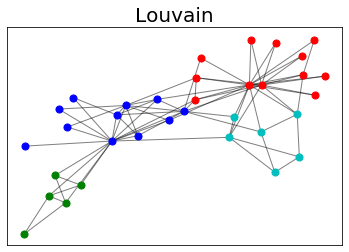

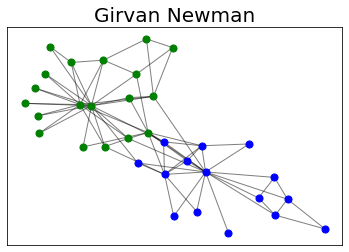

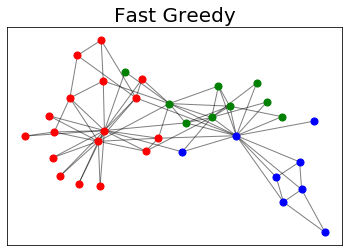

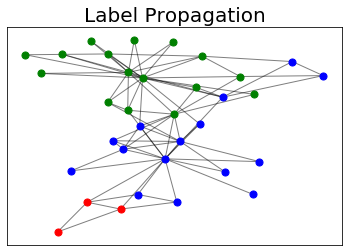

In [4]:
def main():
    #G= G=nx.read_edgelist("data/zachary.txt", nodetype=int)
    G = nx.karate_club_graph()
    G = G.to_undirected()
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    #pos=nx.fruchterman_reingold_layout(G)
    #nx.draw_networkx(G, pos=pos, node_color = 'b')
    #plt.show(True)

    # List of method names
    methodNames = [
        'Louvain',
        'Girvan Newman',
        'Fast Greedy',
        'Label Propagation'
    ]

    # List of community detection methods
    methods = [
        detect_communities_louvain,
        detect_communities_girvan_newman,
        detect_communities_greedy,
        detect_communities_label_propagation
    ]
    # For each method in the list
    for i in range(len(methods)):
        # Apply community detection method on graph
        result = methods[i](G)
        # Plot graph with its communities and name it
        #show_communities(G, result, name=method.__name__[19:])
        show_communities(G, result, name=methodNames[i])

if __name__ == "__main__":
    main()